In [1]:
from text_processing.process_data import ProcessData
from training.models import TrainModels
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from text_processing.process_data import ProcessData
import warnings

warnings.filterwarnings("ignore")

## Data Preparation

In [2]:
# Instantiate classes.
process_data = ProcessData()
# The model is trained on the chars and words levels, without normalizing the sentence length.
dataset = process_data.preprocess_dataset()
train_models = TrainModels(dataset)

In [3]:
# Review data.
dataset.head()

,sentence,language
0,dili outubru gabinete apoiu atividade kónjuge ...,tet
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet
2,iha loron daruak hosi treinamentu ne’e partisi...,tet
3,partisipante na’in-56 iha treinamentu ne’e mai...,tet
4,komunidade iha suku bikeli ho makadade agrades...,tet


In [5]:
# Confirm that data is cleaned.
clean = dataset[(dataset["sentence"] == "") & (dataset["sentence"] == " ")]
try:
    assert len(clean) == 0
    print("The input data is cleaned.")
except AssertionError:
    print("The input data is NOT cleaned.")

The input data is cleaned.


In [6]:
# Print the top-10 of clean data content.
for sentence in dataset['sentence'][:10]:
    print(sentence)

dili outubru gabinete apoiu atividade kónjuge prezidente repúblika gaak-pr hala’o treinamentu ‘hakbiit negosiante’ hodi hasa’e negosiante feto sira-nia abilidade durante loron rua iha suku bikeli no loron rua mós iha suku makadade ataúru no hetan partisipante hamutuk na’in-56 
treinamentu ne’e ninia objetivu prinsipál mak atu hasa’e no kapasita inan-feton sira kona-ba jestaun finansiamentu nune’e bele jere ho di’ak wainhira hala’o negósiu loro-loron nian hodi bele hatene kapitál ho lukru hira mak sira iha 
iha loron daruak hosi treinamentu ne’e partisipante sira mós aprende no simu treinamentu kulinária kona-ba oinsá prepara ai-hán lokál ho di’ak nune’e bele utiliza produtu lokál ka materiál lokál nian maibé sabór furak atu bele dada ka atrai liután turizmu lokál no internasionál ba ataúru 
partisipante na’in-56 iha treinamentu ne’e mai hosi uaruana fatu’u akrema no makadade 
komunidade iha suku bikeli ho makadade agradese ba espoza pr ne’ebé ho inisativa hakbiit negosiante ki’ik liuho

## Train and test model

### Split dataset

In [7]:
# Split dataset to train, development(dev)/validation, and test sets
X_train, y_train, X_dev, y_dev, X_test, y_test = train_models.train_dev_test_split(
    0.3, 0.5)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Dev set size:", len(X_dev))
print("Test set size:", len(X_test))

Train set size: 79492
Dev set size: 17034
Test set size: 17035


### Train and evaluate model

In [8]:
# Compare various models.

models_list = [LinearSVC(), LogisticRegression(
    multi_class="ovr"), MultinomialNB()]
analyzers = ["char_wb", "word"]

train_models.compare_models(models_list, analyzers,
                            1, 6, 1, X_train, y_train, X_dev, y_dev)

Model: LinearSVC()
Analyzer: char_wb
	n_gram 1 --> accuracy:  0.98221
	n_gram 2 --> accuracy:  0.99536
	n_gram 3 --> accuracy:  0.99736
	n_gram 4 --> accuracy:  0.99753
	n_gram 5 --> accuracy:  0.99736
	n_gram 6 --> accuracy:  0.99677
Analyzer: word
	n_gram 1 --> accuracy:  0.99530
	n_gram 2 --> accuracy:  0.96889
	n_gram 3 --> accuracy:  0.83967
	n_gram 4 --> accuracy:  0.53669
	n_gram 5 --> accuracy:  0.42075
	n_gram 6 --> accuracy:  0.37308
Model: LogisticRegression(multi_class='ovr')
Analyzer: char_wb
	n_gram 1 --> accuracy:  0.98116
	n_gram 2 --> accuracy:  0.99530
	n_gram 3 --> accuracy:  0.99695
	n_gram 4 --> accuracy:  0.99753
	n_gram 5 --> accuracy:  0.99706
	n_gram 6 --> accuracy:  0.99601
Analyzer: word
	n_gram 1 --> accuracy:  0.99296
	n_gram 2 --> accuracy:  0.95221
	n_gram 3 --> accuracy:  0.81073
	n_gram 4 --> accuracy:  0.47482
	n_gram 5 --> accuracy:  0.37918
	n_gram 6 --> accuracy:  0.35006
Model: MultinomialNB()
Analyzer: char_wb
	n_gram 1 --> accuracy:  0.94523
	n_g

In [8]:
# Select the best model, train and evaluate it using the dev set.

# Train the model.
model = train_models.train_model(
    TfidfVectorizer(analyzer="char_wb", ngram_range=(5, 5)
                    ), MultinomialNB(), X_train, y_train
)

# Evaluate the model using dev set.
train_models.evaluate_model(model, X_dev, y_dev)

Accuracy:  0.9980626981331455
Confusion Matrix:  [[5205    0    2    0]
 [  15 4762    1    0]
 [   4    4 4365    0]
 [   4    0    3 2669]]
Classification Report:                precision    recall  f1-score   support

          en    0.99560   0.99962   0.99760      5207
          id    0.99916   0.99665   0.99790      4778
          pt    0.99863   0.99817   0.99840      4373
         tet    1.00000   0.99738   0.99869      2676

    accuracy                        0.99806     17034
   macro avg    0.99835   0.99796   0.99815     17034
weighted avg    0.99807   0.99806   0.99806     17034



### Test model

In [9]:
# Evaluate the model using test set.
train_models.evaluate_model(model, X_test, y_test)

Accuracy:  0.9977105958321104
Confusion Matrix:  [[5192    0    3    1]
 [  11 4685    0    1]
 [   7    1 4394    4]
 [   3    0    8 2725]]
Classification Report:                precision    recall  f1-score   support

          en    0.99597   0.99923   0.99760      5196
          id    0.99979   0.99745   0.99861      4697
          pt    0.99750   0.99728   0.99739      4406
         tet    0.99780   0.99598   0.99689      2736

    accuracy                        0.99771     17035
   macro avg    0.99777   0.99748   0.99762     17035
weighted avg    0.99771   0.99771   0.99771     17035



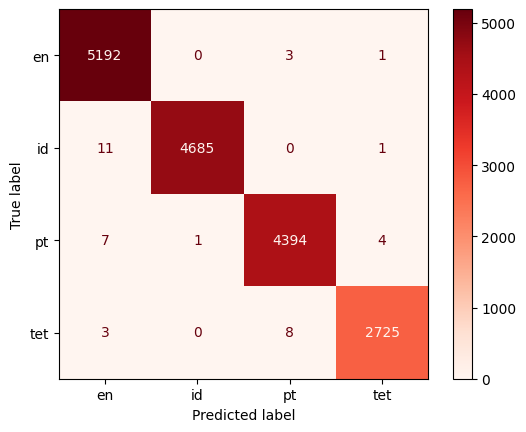

In [24]:
# Confusion matrix - better visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap='Reds')
plt.show()

### Further test

In [11]:
test1 = model.predict(["Organizasaun mundial saúde"])
test2 = model.predict(["Tribunál rekursu rejeita kandidatura partidu"])
print(f"Test 1 classification: {test1}\nTest 2 classification: {test2}")

Test 1 classification: ['tet']
Test 2 classification: ['tet']


In [12]:
input = [
    "Deklarasaun Universál Direitus Umanus",
    "Indonesia merupakan negara terluas ke-14 sekaligus",
    "A língua portuguesa, também designada português, é uma língua",
    "Deklarasaun ne'e inklui artigu 30 ne'ebé esplika Asembleia Jerál",
    "Can we feed a future population of 10 billion people a healthy?",
]

# Naive Bayes and Logistic Regression.
pred_probs = model.predict_proba(input)

for i, probs in enumerate(pred_probs):
    print(input[i])
    for j, lang in enumerate(model.classes_):
        print(lang, probs[j])

Deklarasaun Universál Direitus Umanus
en 2.8512732170291742e-05
id 8.949322982940391e-05
pt 0.0002959127683900993
tet 0.9995860812696081
Indonesia merupakan negara terluas ke-14 sekaligus
en 2.777319838763683e-07
id 0.9999988982394855
pt 2.196652093543145e-07
tet 6.04363321897563e-07
A língua portuguesa, também designada português, é uma língua
en 0.00017074857088099135
id 3.0375330735971467e-05
pt 0.9986205488438126
tet 0.0011783272545739549
Deklarasaun ne'e inklui artigu 30 ne'ebé esplika Asembleia Jerál
en 3.090102033127752e-08
id 3.621711208331084e-08
pt 1.4671364314537727e-07
tet 0.9999997861682262
Can we feed a future population of 10 billion people a healthy?
en 0.9999982603677747
id 1.3167548265092372e-07
pt 8.964250178481708e-07
tet 7.115317268477991e-07


In [ ]:

import numpy as np
# SVM - LinearSVC
pred_result = model.predict(input)
pred_probability = model.decision_function(input)
for i in range(len(input)):
    print(
        f"{input[i]} ---> {pred_result[i]} ---> {np.argmax(pred_probability[i])} --> {pred_probability[i]} "
    )

### Save model [if required]

In [13]:
import joblib

# Save the model to a file
# joblib.dump(model, "model_best/tet_lid_NB_best_ng5chars_9977.pkl")

['model_best/tet_lid_NB_best_ng5chars_9977.pkl']

### Load model

In [14]:
import joblib

# Load the model from a file
saved_model = joblib.load("model_best/tet_lid_NB_best_ng5chars_9977.pkl")

text = ["Timor-Leste", "Timor", "Lei"]

pred_probs = saved_model.predict_proba(text)

for i, probs in enumerate(pred_probs):
    print(text[i])
    for j, lang in enumerate(saved_model.classes_):
        print(lang, probs[j])

Timor-Leste
en 5.112054233059201e-07
id 1.89281293410119e-06
pt 2.696616318632009e-06
tet 0.9999948993653245
Timor
en 0.0005777270313571023
id 0.004767330302296208
pt 0.0006453106049057784
tet 0.9940096320614406
Lei
en 0.02370068149521924
id 0.024037591350435927
pt 0.4782344962369875
tet 0.4740272309173575
